In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, ConfusionMatrixDisplay
from imblearn.over_sampling import SMOTE
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn import svm
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV

In [2]:
data = pd.read_excel("C:\\Users\\Phil\\CaseStudy\\PSP_DATA_PREP.xlsx")

data_success = data[data['success'] == 1]
data_fail = data[data['success'] == 0]

data_success = data_success.drop(columns=['PSP_Goldcard', 'PSP_Moneycard', 'PSP_Simplecard', 'PSP_UK_Card', 'success']) 
data_fail = data_fail.drop(columns=['PSP_Goldcard', 'PSP_Moneycard', 'PSP_Simplecard', 'PSP_UK_Card', 'success'])

data = data.drop(columns=['PSP_target'])

data.head()

,tmsp,attempts,success,3D_secured,fee,hour,day_of_week,amount_norm,country_Austria,country_Germany,country_Switzerland,card_Diners,card_Master,card_Visa,PSP_Goldcard,PSP_Moneycard,PSP_Simplecard,PSP_UK_Card
0,2019-01-01 00:01:11,2,1,0,4.0,0,1,0.133013,0,1,0,0,0,1,0,0,0,1
1,2019-01-01 00:02:49,2,1,1,4.0,0,1,0.371795,0,1,0,1,0,0,0,0,0,1
2,2019-01-01 00:04:33,1,0,0,0.5,0,1,0.189103,1,0,0,1,0,0,0,0,1,0
3,2019-01-01 00:06:41,2,0,0,1.5,0,1,0.442308,0,0,1,0,1,0,0,0,1,0
4,2019-01-01 00:08:46,1,1,0,3.0,0,1,0.177885,0,1,0,0,1,0,0,0,0,1


In [3]:
# Define the feature matrix X and target y, and split data into training and testing sets
X = data.drop(columns=['success', 'fee', 'attempts', 'tmsp'])
y = data['success']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [4]:
# create a function to evaluate the models
def evaluate(y_test, y_pred):
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)

    return [accuracy, precision, recall, f1]

Accuracy: 0.6410021945866862
Precision: 0.5486935866983373
Recall: 0.22591687041564792
F1: 0.3200554208520956


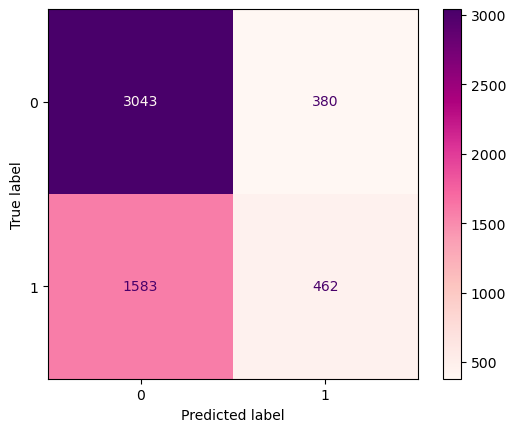

In [6]:
# Train a logistic regression model and make a prediction
baseline_model = LogisticRegression(max_iter=1000)
baseline_model.fit(X_train, y_train)
y_pred = baseline_model.predict(X_test)

# Evaluate the model 
score_log = evaluate(y_test, y_pred)
print(f"Accuracy: {score_log[0]}\nPrecision: {score_log[1]}\nRecall: {score_log[2]}\nF1: {score_log[3]}")

# display the confusion matrix
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(cm)
disp.plot(cmap='RdPu')

In [5]:
# Create a class balanced data set with SMOTE to retrain models on
smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

Accuracy: 0.626188734455011
Precision: 0.5002016942315449
Recall: 0.6063569682151589
F1: 0.5481874447391689


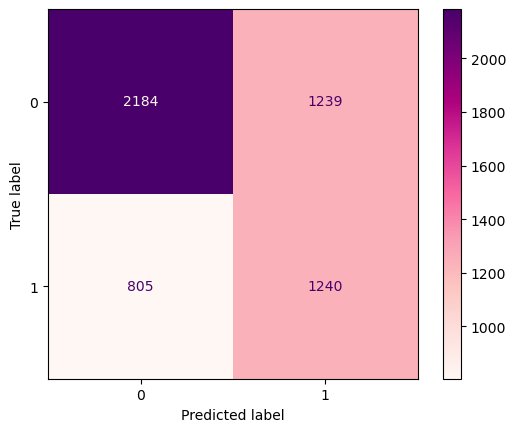

In [48]:
# Train a new logistic regression model with SMOTE balanced classes
smote_model = LogisticRegression(max_iter=1000)
smote_model.fit(X_train_smote, y_train_smote)
smote_y_pred = smote_model.predict(X_test)

# Evalute Accuracy
score_log_bal = evaluate(y_test, smote_y_pred)
print(f"Accuracy: {score_log_bal[0]}\nPrecision: {score_log_bal[1]}\nRecall: {score_log_bal[2]}\nF1: {score_log_bal[3]}")

# Display the confusion matrix
cm = confusion_matrix(y_test, smote_y_pred)
disp = ConfusionMatrixDisplay(cm)
disp.plot(cmap='RdPu')
plt.show()

Accuracy: 0.6464886613021215
Precision: 0.5320733104238259
Recall: 0.454278728606357
F1: 0.4901081508836719


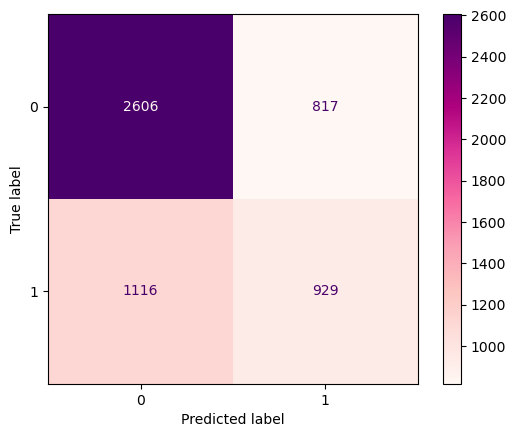

In [49]:
#Random forest model without SMOTE balanced classes
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)

#assess accuracy
score_rf = evaluate(y_test, y_pred_rf)
print(f"Accuracy: {score_rf[0]}\nPrecision: {score_rf[1]}\nRecall: {score_rf[2]}\nF1: {score_rf[3]}")

#display the confusion matrix
cm = confusion_matrix(y_test, y_pred_rf)
disp = ConfusionMatrixDisplay(cm)
disp.plot(cmap='RdPu')

Accuracy: 0.6464886613021215
Precision: 0.5320733104238259
Recall: 0.454278728606357
F1: 0.4901081508836719


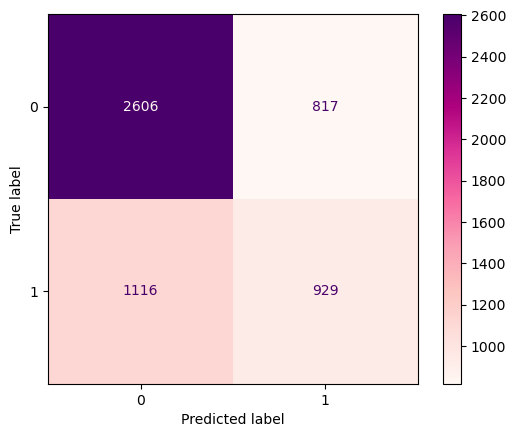

In [50]:
#Random forest model with scikit balanced
rf_model_balanced = RandomForestClassifier(random_state=42, class_weight='balanced')
rf_model_balanced.fit(X_train, y_train)
y_pred_rf_balanced = rf_model.predict(X_test)

#assess accuracy
score_rf_bal = evaluate(y_test, y_pred_rf_balanced)
print(f"Accuracy: {score_rf_bal[0]}\nPrecision: {score_rf_bal[1]}\nRecall: {score_rf_bal[2]}\nF1: {score_rf_bal[3]}")

#display the confusion matrix
cm = confusion_matrix(y_test, y_pred_rf_balanced)
disp = ConfusionMatrixDisplay(cm)
disp.plot(cmap='RdPu')

Accuracy: 0.6746525237746891
Precision: 0.5553705245628643
Recall: 0.652322738386308
F1: 0.5999550258601304


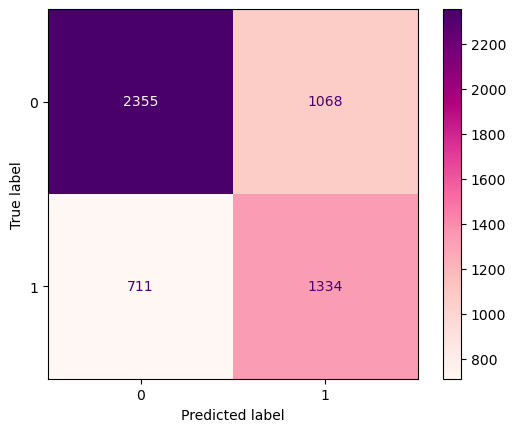

In [61]:
#Train Random forest Model with SMOTE balanced classes
rf_model_smote = RandomForestClassifier(random_state=42, max_depth=9)
rf_model_smote.fit(X_train_smote, y_train_smote)
y_pred_rf_smote = rf_model_smote.predict(X_test)

#Assess accuracy for randomforest model
score_rf_smote = evaluate(y_test, y_pred_rf_smote)
print(f"Accuracy: {score_rf_smote[0]}\nPrecision: {score_rf_smote[1]}\nRecall: {score_rf_smote[2]}\nF1: {score_rf_smote[3]}")

#display the confusion matrix
cm = confusion_matrix(y_test, y_pred_rf_smote)
disp = ConfusionMatrixDisplay(cm)
disp.plot(cmap='RdPu')

In [77]:
score_rf_search = []
for x in range(1,16):
    model = RandomForestClassifier(random_state=42, max_depth=x)
    model.fit(X_train_smote, y_train_smote)
    y_pred_gb = model.predict(X_test)

    current_score = evaluate(y_test, y_pred_gb)

    score_rf_search.append([x, current_score[0], current_score[1], current_score[2], current_score[3]])

    print(f"F1 score for depth = {x} is {current_score[3]}")

score_rf_search = np.array(score_rf_search)


F1 score for depth = 1 is 0.5502879929109438
F1 score for depth = 2 is 0.5501239017796801
F1 score for depth = 3 is 0.5383522727272727
F1 score for depth = 4 is 0.5517073170731708
F1 score for depth = 5 is 0.5735052754982415
F1 score for depth = 6 is 0.5874285714285714
F1 score for depth = 7 is 0.590919358482042
F1 score for depth = 8 is 0.5986547085201793
F1 score for depth = 9 is 0.5999550258601304
F1 score for depth = 10 is 0.5967376529225192
F1 score for depth = 11 is 0.5909811919329254
F1 score for depth = 12 is 0.5818265049210346
F1 score for depth = 13 is 0.576076993583868
F1 score for depth = 14 is 0.5673563218390805
F1 score for depth = 15 is 0.56


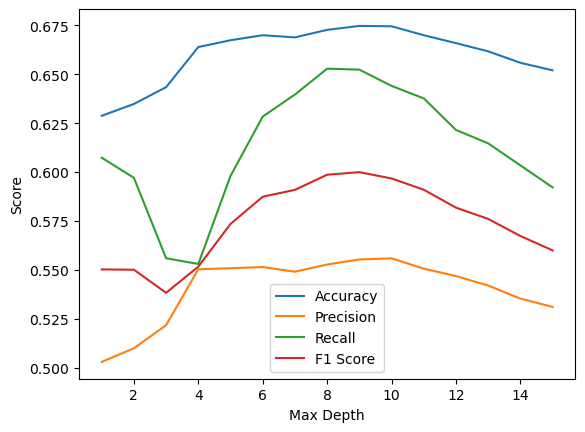

In [82]:
labels = ['Accuracy', 'Precision', 'Recall', 'F1 Score']

for x in range(1,5):
    plt.plot(score_rf_search[:,0], score_rf_search[:,x], label=labels[x-1])

plt.xlabel('Max Depth')
plt.ylabel('Score')

plt.legend()
plt.show()

In [16]:
# Try grid search on random forest model

random_forest = RandomForestClassifier(random_state=42)

# Set up the parameter grid
param_grid = {
    'n_estimators': [150, 200, 250],
    'max_depth': [6, 8, 9],
    'min_samples_split': [2, 3, 4],
    'min_samples_leaf': [1, 2, 3, 4],
    'max_features': [2, 5, 'sqrt', 'log2', None]
}

# Perform grid search
grid_search = GridSearchCV(estimator=random_forest, scoring='f1', param_grid=param_grid, cv=5, n_jobs=14, verbose=4)
grid_search.fit(X_train_smote, y_train_smote)

# Get the best parameters
best_params = grid_search.best_params_
print(f'Best Parameters found: {best_params}')
best_accuracy = grid_search.best_score_
print(f'Best F1 found: {best_accuracy}')



Fitting 5 folds for each of 540 candidates, totalling 2700 fits


c:\Users\Phil\anaconda3\Lib\site-packages\numpy\ma\core.py:2820: RuntimeWarning: invalid value encountered in cast
  _data = np.array(data, dtype=dtype, copy=copy,


Best Parameters found: {'max_depth': 9, 'max_features': None, 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 250}
Best Accuracy found: 0.6877352662319278


Accuracy: 0.6677029992684711
Precision: 0.5455271565495208
Recall: 0.6679706601466993
F1: 0.6005715541877336


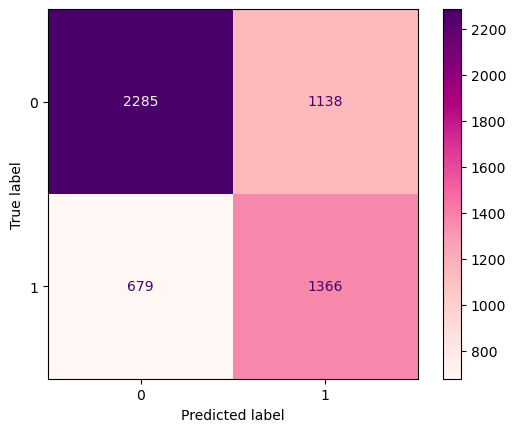

In [20]:
random_forest_opt = RandomForestClassifier(random_state=42, n_estimators=250, max_depth=9, min_samples_split=2, min_samples_leaf=2, max_features=None)

random_forest_opt.fit(X_train_smote, y_train_smote)
y_pred_rf_opt = random_forest_opt.predict(X_test)

score_rf_opt = evaluate(y_test, y_pred_rf_opt)
print(f"Accuracy: {score_rf_opt[0]}\nPrecision: {score_rf_opt[1]}\nRecall: {score_rf_opt[2]}\nF1: {score_rf_opt[3]}")

#display the confusion matrix
cm = confusion_matrix(y_test, y_pred_rf_opt)
disp = ConfusionMatrixDisplay(cm)
disp.plot(cmap='RdPu')

Accuracy: 0.6558156547183613
Precision: 0.536045997346307
Recall: 0.5926650366748166
F1: 0.5629354389224338


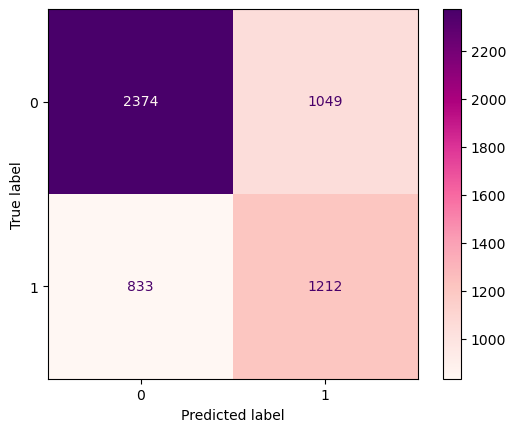

In [7]:
# Train a model with gradient boosting
gb_model = GradientBoostingClassifier(random_state=42, max_depth=10)
gb_model.fit(X_train_smote, y_train_smote)
y_pred_gb = gb_model.predict(X_test)

# Evalutate Accuracy
score_gb = evaluate(y_test, y_pred_gb)
print(f"Accuracy: {score_gb[0]}\nPrecision: {score_gb[1]}\nRecall: {score_gb[2]}\nF1: {score_gb[3]}")

# Display the confusion matrix
cm = confusion_matrix(y_test, y_pred_gb)
disp = ConfusionMatrixDisplay(cm)
disp.plot(cmap='RdPu')

In [10]:
# Try grid search on gradient boost model

gb = GradientBoostingClassifier(random_state=42)

# Set up the parameter grid
param_grid = {
    'n_estimators': [250, 300, 350],
    'max_depth': [6, 8, 9],
    'min_samples_split': [2, 3, 4, 5],
    'min_samples_leaf': [1, 2, 3, 4],
    'max_features': [2, 'sqrt', 'log2', None],
    'criterion': ['friedman_mse', 'squared_error'],
    'learning_rate': [0.01, 0.1, 0.5]
}

# Perform grid search
grid_search = GridSearchCV(estimator=gb, scoring='f1', param_grid=param_grid, cv=5, n_jobs=6, verbose=3)
grid_search.fit(X_train_smote, y_train_smote)

# Get the best parameters
best_params = grid_search.best_params_
print(f'Best Parameters found: {best_params}')
best_accuracy = grid_search.best_score_
print(f'Best F1 found: {best_accuracy}')

Fitting 5 folds for each of 3456 candidates, totalling 17280 fits
Best Parameters found: {'criterion': 'friedman_mse', 'learning_rate': 0.1, 'max_depth': 8, 'max_features': 'sqrt', 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 250}
Best F1 found: 0.6959382579868372


Accuracy: 0.6534381858083395
Precision: 0.53315649867374
Recall: 0.5897310513447432
F1: 0.560018574413745


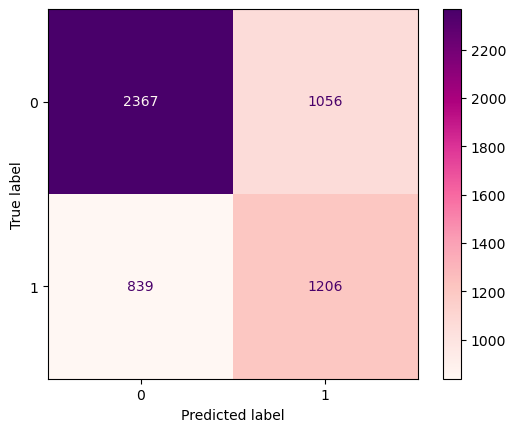

In [11]:
# Train a model with gradient boosting
gb_model_opt = GradientBoostingClassifier(criterion='friedman_mse', learning_rate = 0.1, random_state=42, max_depth=8, max_features='sqrt', min_samples_leaf=2, min_samples_split=2, n_estimators=250)
gb_model_opt.fit(X_train_smote, y_train_smote)
y_pred_gb = gb_model_opt.predict(X_test)

# Evalutate Accuracy
score_gb_opt = evaluate(y_test, y_pred_gb)
print(f"Accuracy: {score_gb_opt[0]}\nPrecision: {score_gb_opt[1]}\nRecall: {score_gb_opt[2]}\nF1: {score_gb_opt[3]}")

# Display the confusion matrix
cm = confusion_matrix(y_test, y_pred_gb)
disp = ConfusionMatrixDisplay(cm)
disp.plot(cmap='RdPu')

Accuracy: 0.6528895391367959
Precision: 0.5645302897278315
Recall: 0.31442542787286065
F1: 0.40389447236180903


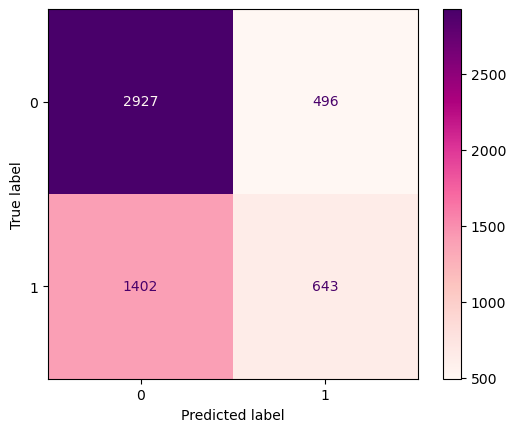

In [55]:
# Train a model using SVM
# Need a scalar for the data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Train SVM
svm_classifier = SVC(kernel='rbf', random_state=42)  # Using a linear kernel
svm_classifier.fit(X_train_scaled, y_train)
y_pred_svm = svm_classifier.predict(X_test_scaled)

# Evalutate Accuracy
score_svm = evaluate(y_test, y_pred_svm)
print(f"Accuracy: {score_svm[0]}\nPrecision: {score_svm[1]}\nRecall: {score_svm[2]}\nF1: {score_svm[3]}")

# Display the confusion matrix
cm = confusion_matrix(y_test, y_pred_svm)
disp = ConfusionMatrixDisplay(cm)
disp.plot(cmap='RdPu')

In [56]:
results = pd.DataFrame()
results['Key'] = ['Accuracy', 'Precision', 'Recall', 'F1']
results['Logistic'] = score_log
results['Logistic_Balanced'] = score_log_bal
results['RandomForest'] = score_rf
results['RandomForest_Balanced'] = score_rf_bal
results['RandomForest_SMOTE'] = score_rf_smote
results['GradientBoosting'] = score_gb
results.T

,0,1,2,3
Key,Accuracy,Precision,Recall,F1
Logistic,0.641002,0.548694,0.225917,0.320055
Logistic_Balanced,0.626189,0.500202,0.606357,0.548187
RandomForest,0.646489,0.532073,0.454279,0.490108
RandomForest_Balanced,0.646489,0.532073,0.454279,0.490108
RandomForest_SMOTE,0.67447,0.555931,0.64401,0.596738
GradientBoosting,0.63771,0.514035,0.573105,0.541965


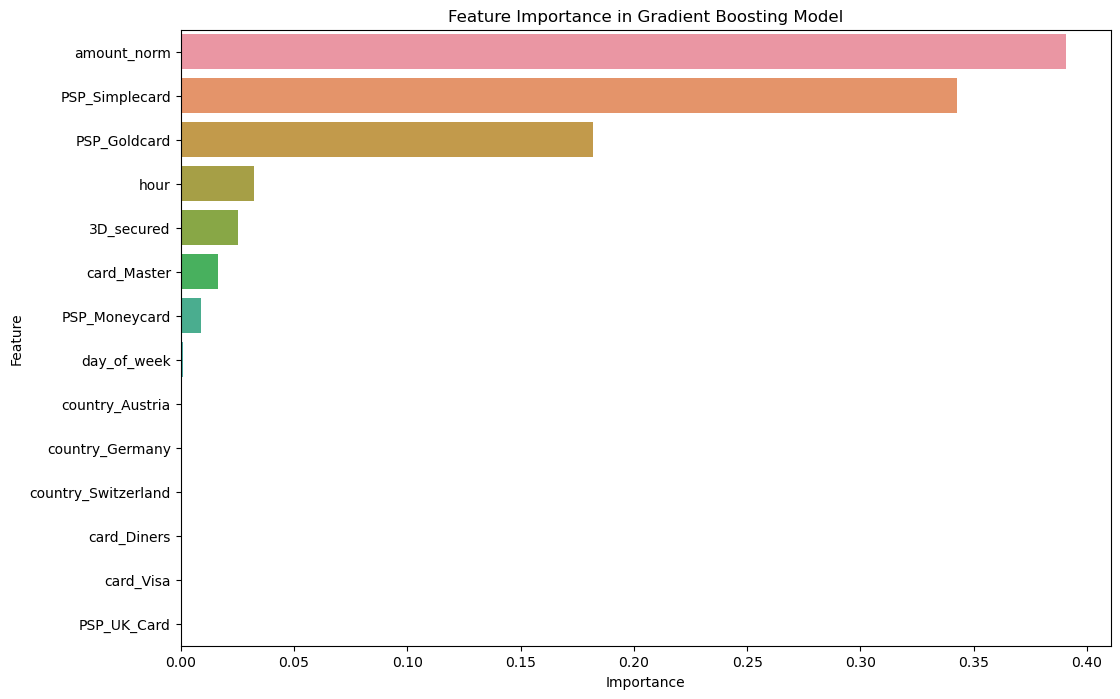

,Feature,Importance
3,amount_norm,0.390858
12,PSP_Simplecard,0.342662
10,PSP_Goldcard,0.181862
1,hour,0.032371
0,3D_secured,0.025418
8,card_Master,0.016530
11,PSP_Moneycard,0.009110
2,day_of_week,0.001188
4,country_Austria,0.000000
5,country_Germany,0.000000


In [57]:
feature_importances = gb_model.feature_importances_
features = X.columns

feature_importance_gb = pd.DataFrame({'Feature': features, 'Importance': feature_importances})
feature_importance_gb = feature_importance_gb.sort_values(by='Importance', ascending=False)

# Plot feature importances
plt.figure(figsize=(12, 8))
sns.barplot(x='Importance', y='Feature', data=feature_importance_gb)
plt.title('Feature Importance in Gradient Boosting Model')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()

feature_importance_gb

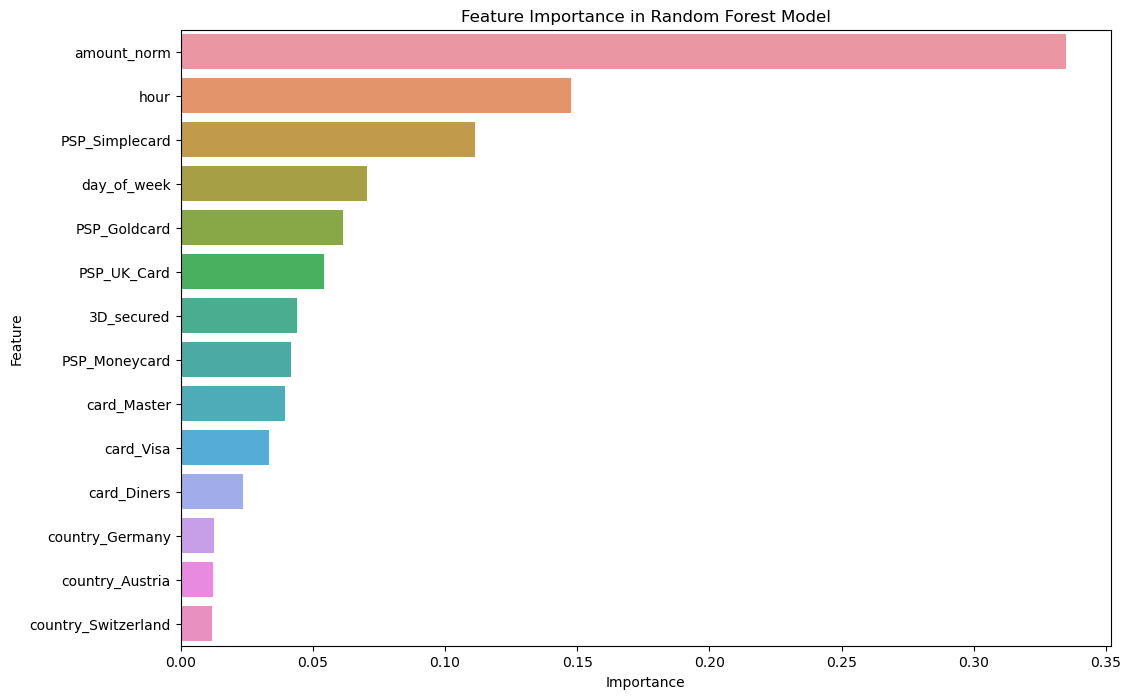

,Feature,Importance
3,amount_norm,0.334988
1,hour,0.147692
12,PSP_Simplecard,0.111446
2,day_of_week,0.070586
10,PSP_Goldcard,0.061456
13,PSP_UK_Card,0.054291
0,3D_secured,0.044147
11,PSP_Moneycard,0.041802
8,card_Master,0.039364
9,card_Visa,0.033583


In [58]:
feature_importances = rf_model_smote.feature_importances_
features = X.columns

feature_importance_df = pd.DataFrame({'Feature': features, 'Importance': feature_importances})
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Plot feature importances
plt.figure(figsize=(12, 8))
sns.barplot(x='Importance', y='Feature', data=feature_importance_df)
plt.title('Feature Importance in Random Forest Model')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()

feature_importance_df

In [59]:
data_success['fee'].describe()

count    10225.000000
mean         4.909340
std          3.075233
min          1.000000
25%          3.000000
50%          4.000000
75%          6.000000
max         23.000000
Name: fee, dtype: float64

In [60]:
X = data_success.drop(columns=['success', 'fee', 'attempts', 'tmsp', 'PSP'])
y = data_success['PSP']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

KeyError: "['success', 'PSP'] not found in axis"

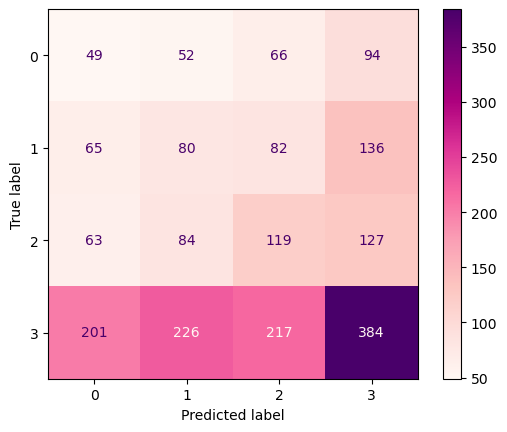

In [ ]:
#Train Random forest Model with SMOTE balanced classes
dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train_smote, y_train_smote)
y_pred = dt_model.predict(X_test)

#display the confusion matrix
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(cm)
disp.plot(cmap='RdPu')

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

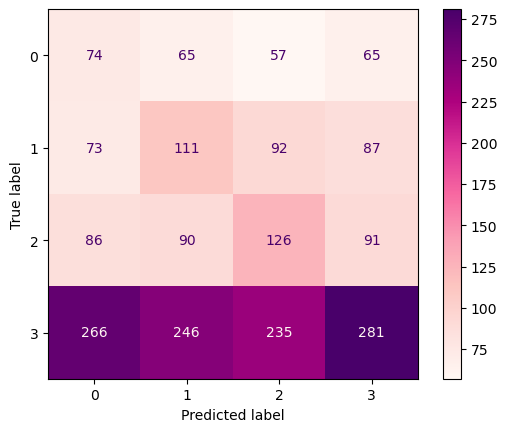

In [ ]:
kneighbors = KNeighborsClassifier(n_neighbors=5)
kneighbors.fit(X_train_smote, y_train_smote)
y_pred = kneighbors.predict(X_test)

#display the confusion matrix
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(cm)
disp.plot(cmap='RdPu')